## THE SPARKS FOUNDATION

## GRIPSEPT2021 - Data Science and Business Analytics

### Task 1 : Prediction using supervised Machine Learning

#### Prepared by Bhargavi K C

The problem statement is to predict the percentage score of a student based on their number of study hours per day by performing simple linear regression with the dataset that involves just 2 variables.

The objective is to find the predicted score if a student studies for 9.25 hours/day

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing data

In [2]:
df = pd.read_csv("Task 1 - Linear Regression.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking for duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


#### Exploratory data analysis

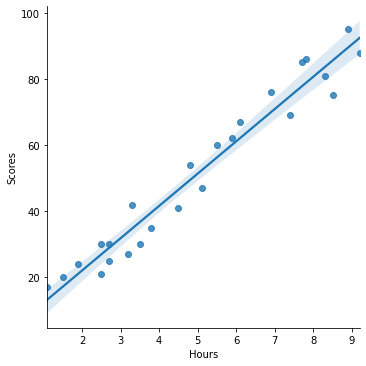

In [6]:
sns.lmplot(y="Scores", x="Hours", data=df);

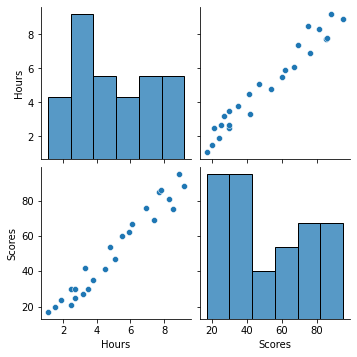

In [7]:
sns.pairplot(df);

<AxesSubplot:>

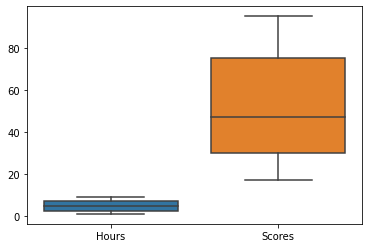

In [8]:
sns.boxplot(data=df);

#### Preparing the dataset

In [9]:
# Divide data to 'attributes'(input) and 'labels'(output)
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

#### Train - Test Split

In [10]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=2)

#### Linear Regression Model (using Scikit-learn library)

In [11]:
from sklearn.linear_model import LinearRegression

#### Training the model

In [12]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

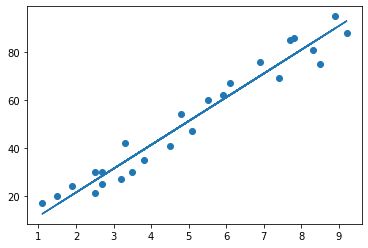

In [13]:
# Plotting the regression line
line = regression_model.coef_*X+regression_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making predictions

In [14]:
print(X_test)
y_pred = regression_model.predict(X_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [15]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


<AxesSubplot:>

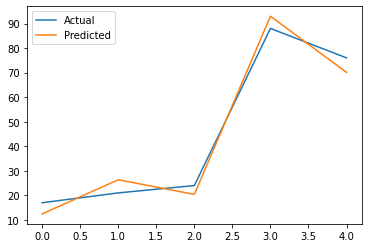

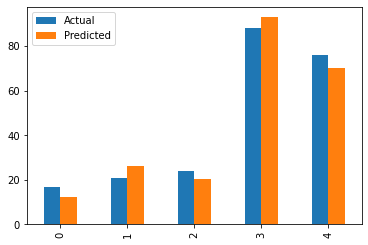

In [20]:
df1.plot(kind='line');
df1.plot(kind='bar');

#### Evaluation of the model

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.877039354964484
Mean Squared Error: 24.38762033985666
Root Mean Squared Error: 4.938382360637607
R-2: 0.9735538080811826


#### An R-squared of 97% means that all movements of the dependent variable is almost completely explained by movements in the index indendent variable.

#### Predicted score if a student studies for 9.25 hours/day

In [18]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regression_model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.45860055685799


#### When a student studies for 9.25 hours, his/her score is predicted to be 93.46%